In [13]:
%load_ext autoreload
%load_ext watermark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [14]:
%autoreload 2

In [15]:
%watermark -ntz -p pandas,pandas_profiling,traffic_exercise

Wed Jul 27 2022 10:58:08 India Standard Time 

pandas 1.0.4
pandas_profiling 2.8.0
traffic_exercise unknown


In [170]:
import os
from pathlib import Path

import pandas as pd
import pandas_profiling
import seaborn as sns
from matplotlib import pyplot as plt
import traffic_exercise.data

---
# Exercise 1: Loading and Cleaning Data
To complete this training project,
we need clean,
usable data.
You have been provided some [raw data files](../data/raw)
containing weather and traffic data.
In this exercise,
you will be investigating the data
to identify any missing or bad values.
Then you will implement a function
to clean the data.
The output of this exercise
will be cleaned data
for use in later exercises.

## Learning objectives
Objectives which _may_ be met during this exercise.

_Refer to the [exercise document](../references/exercise_background.md#development-objectives) for more information on objectives_

- I can load and save data as common tabular data formats
- I can manipulate the structure of a data table
- I can identify bad or missing data (_DATA 1_)
- I can implement checks against data structure (_DATA 1_)
- I can extract simple features from a data table (_DATA 1_)

---
## Step 1: Investigate weather data
Basic functions have been provided in `src/traffic-exercise/data/` for loading the excel files containing the raw data as pandas dataframes.
Here,
we will load the weather data
and perform simple investigation
into the form of the data.

In [62]:
raw_data_path = Path.cwd().resolve().parent /'analysis'/ "data" / "raw"
print(raw_data_path)
print(type(raw_data_path))
Path.cwd().resolve().parent /'analysis'/ "data" / "interim"

C:\Users\ANIRUPAD\OneDrive - Capgemini\Desktop\Effect of Weather on Road Traffic\analysis\data\raw
<class 'pathlib.WindowsPath'>


WindowsPath('C:/Users/ANIRUPAD/OneDrive - Capgemini/Desktop/Effect of Weather on Road Traffic/analysis/data/interim')

In [18]:
weather_data = traffic_exercise.data.parse_weather_file(raw_data_path / "raw_weather_2019.xlsx")
weather_data.head()

,Date,Rainfall (mm),MaxApparentTemp (degC)
0,1 Jan2019,0.0,7.7
1,2 Jan2019,0.0,0.4
2,3 Jan2019,0.0,1.0
3,4 Jan2019,0.0,2.8
4,5 Jan2019,0.0,3.4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    372 non-null    object 
 1   Rainfall (mm)           365 non-null    float64
 2   MaxApparentTemp (degC)  365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.6+ KB
       Rainfall (mm)  MaxApparentTemp (degC)
count     365.000000              365.000000
mean        2.823288               10.156986
std         5.356349                6.947759
min         0.000000               -4.800000
25%         0.000000                4.700000
50%         0.600000                9.300000
75%         3.100000               15.100000
max        35.600000               33.100000


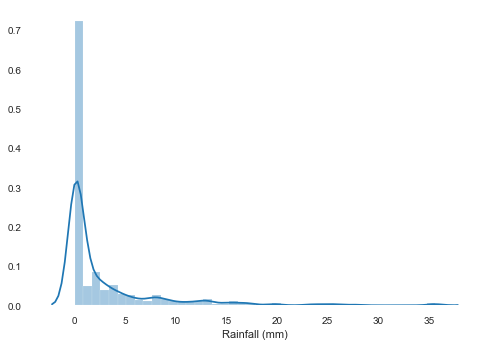

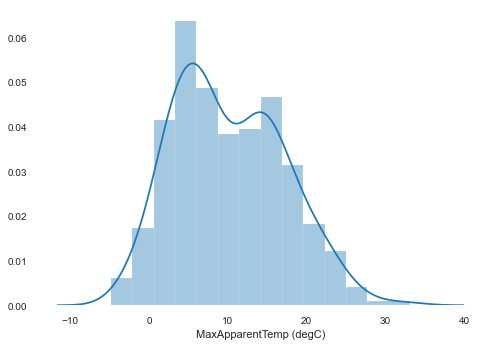

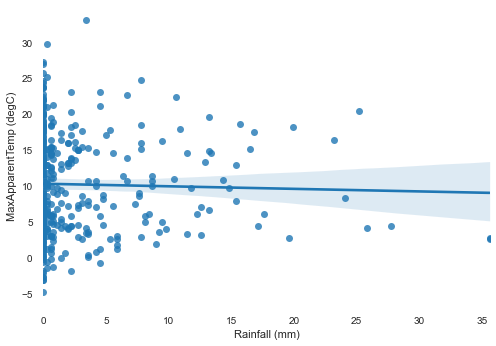

In [32]:
weather_data.info()
print(weather_data.describe())
for column in weather_data.columns:
    if column != 'Date':
        plt.figure()
        sns.distplot(weather_data[column])
plt.figure()
sns.regplot(x='Rainfall (mm)',y = 'MaxApparentTemp (degC)', data = weather_data)

In [23]:
weather_data.Date.unique()

array(['1 Jan2019', '2 Jan2019', '3 Jan2019', '4 Jan2019', '5 Jan2019',
       '6 Jan2019', '7 Jan2019', '8 Jan2019', '9 Jan2019', '10 Jan2019',
       '11 Jan2019', '12 Jan2019', '13 Jan2019', '14 Jan2019',
       '15 Jan2019', '16 Jan2019', '17 Jan2019', '18 Jan2019',
       '19 Jan2019', '20 Jan2019', '21 Jan2019', '22 Jan2019',
       '23 Jan2019', '24 Jan2019', '25 Jan2019', '26 Jan2019',
       '27 Jan2019', '28 Jan2019', '29 Jan2019', '30 Jan2019',
       '31 Jan2019', '1 Feb2019', '2 Feb2019', '3 Feb2019', '4 Feb2019',
       '5 Feb2019', '6 Feb2019', '7 Feb2019', '8 Feb2019', '9 Feb2019',
       '10 Feb2019', '11 Feb2019', '12 Feb2019', '13 Feb2019',
       '14 Feb2019', '15 Feb2019', '16 Feb2019', '17 Feb2019',
       '18 Feb2019', '19 Feb2019', '20 Feb2019', '21 Feb2019',
       '22 Feb2019', '23 Feb2019', '24 Feb2019', '25 Feb2019',
       '26 Feb2019', '27 Feb2019', '28 Feb2019', '29 Feb2019',
       '30 Feb2019', '31 Feb2019', '1 Mar2019', '2 Mar2019', '3 Mar2019',
      

**Tasks:**
- Either using built-in pandas dataframe methods or `pandas_profiling`,
find out the range of values `Rainfall` and `MaxApparentTemp` took during 2019
- Are these ranges sensible?
- Does rainfall or temperature have the most variation?
- Which one has the most extreme outliers?

-Rainfall has a range of (0,35.6)mm.<br>
-MaxApparentTemp has a range of (-4.8,33.1)C<br>
-The ranges seem sensible.<br>
-MaxApparentTemp has more variation.<br>
-Rainfall has more extreme outliers.<br>

In [20]:
from pandas_profiling import ProfileReport
prof = ProfileReport(weather_data)
prof

---
## Step 2: Clean weather data
`weather_data` contains some data values it shouldn't.

**Tasks:**
- Profile `weather_data` to find the data which should be removed. What does this data correspond to?
- In `src/traffic_exercise/data/clean_weather_data.py`, implement the `_clean_weather_data` function
- Implement remaining `TODO` tasks in `src/traffic_exercise/data/clean_weather_data.py`
- Call `parse_weather_file` again to get clean weather data
    - Provide a filepath using `pathlib.Path` to save the parsed weather file to `data/interim`

All the imaginary dates need to be removed here. like 31 Feb 2019

In [46]:
weather_data[~  (   (weather_data['Rainfall (mm)'].isna())   &   (weather_data['MaxApparentTemp (degC)'].isna())   )]

,Date,Rainfall (mm),MaxApparentTemp (degC)
0,1 Jan2019,0.0,7.7
1,2 Jan2019,0.0,0.4
2,3 Jan2019,0.0,1.0
3,4 Jan2019,0.0,2.8
4,5 Jan2019,0.0,3.4
...,...,...,...
367,27 Dec2019,0.6,5.8
368,28 Dec2019,0.3,6.8
369,29 Dec2019,0.0,6.3
370,30 Dec2019,0.0,7.3


In [61]:
Path.cwd().resolve().parent /'analysis'/ "data" / "interim"

WindowsPath('C:/Users/ANIRUPAD/OneDrive - Capgemini/Desktop/Effect of Weather on Road Traffic/analysis/data/interim')

In [63]:
weather_data_clean = traffic_exercise.data.parse_weather_file(
    raw_data_path / "raw_weather_2019.xlsx",
     Path.cwd().resolve().parent /'analysis'/ "data" / "interim" / 'weather_data_i.csv')

In [55]:
weather_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    365 non-null    datetime64[ns]
 1   Rainfall (mm)           365 non-null    float64       
 2   MaxApparentTemp (degC)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.4 KB


In [168]:
weather_data_clean.head()

,Date,Rainfall (mm),MaxApparentTemp (degC)
0,2019-01-01,0.0,7.7
1,2019-01-02,0.0,0.4
2,2019-01-03,0.0,1.0
3,2019-01-04,0.0,2.8
4,2019-01-05,0.0,3.4


---
## Step 3: Investigate and clean a counter datafile
Traffic data is split across several files,
each containing data from different collection sites.

**Tasks:**
- Load a traffic file of your choice
- Check for missing or corrupted values
- In `src/traffic_exercise/data/clean_counting_data.py`, implement the `_clean_traffic_data` function
- Implement all remaining `TODO`s in `src/traffic_exercise/data/clean_counting_data.py`
- Investigate the range of the data parameters. Are they all sensible?

In [57]:
traffic_data_path = raw_data_path / "counters"

In [58]:
counter_file = "30021_30022_2019.xlsx"  
counter = 30021  # TODO select one of the sites included in the counter file

traffic_count_data = traffic_exercise.data.parse_counter_file(traffic_data_path / counter_file, counter)
traffic_count_data.head()

,Date,Hour Ending,Special day,Counter ID,Counts
0,2019-01-01 01:00:00,1,bo,30021,10
1,2019-01-02 01:00:00,1,o,30021,0
2,2019-01-03 01:00:00,1,o,30021,0
3,2019-01-04 01:00:00,1,o,30021,4
4,2019-01-05 01:00:00,1,o,30021,1


In [106]:
traffic_count_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8760 non-null   datetime64[ns]
 1   Hour Ending  8928 non-null   int32         
 2   Special day  2280 non-null   object        
 3   Counter ID   8928 non-null   int64         
 4   Counts       8766 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 314.0+ KB


In [119]:
df1 = pd.read_excel(traffic_data_path / counter_file, sheet_name=f"{counter} Tabular")

In [75]:
df1.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Yearly Tabular report during 2019 for site 103...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"NB, A592, Patterdale (E339286, N516152)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hourly Flows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hour Ending,NaN,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,Total
5,bo,Tue 1 Jan,10,1,0,0,2,1,0,3,...,144,112,34,11,6,5,4,1,1,979
6,o,Wed 2 Jan,0,1,0,0,1,2,7,8,...,100,88,36,19,8,9,3,2,2,871
7,o,Thu 3 Jan,0,1,0,0,0,1,6,7,...,76,62,30,17,11,2,9,8,3,658
8,o,Fri 4 Jan,4,1,3,0,1,0,3,14,...,62,66,26,17,12,7,5,4,5,678
9,o,Sat 5 Jan,1,1,0,1,0,4,5,14,...,67,55,31,32,11,12,6,6,2,754


In [120]:
row_index = df1.index[df1.iloc[:, 0] == "Hour Ending"][0]
headers = df1.iloc[row_index, :]
headers[0] = "Special day"
headers[1] = "Date"
headers

Unnamed: 0     Special day
Unnamed: 1            Date
Unnamed: 2               1
Unnamed: 3               2
Unnamed: 4               3
Unnamed: 5               4
Unnamed: 6               5
Unnamed: 7               6
Unnamed: 8               7
Unnamed: 9               8
Unnamed: 10              9
Unnamed: 11             10
Unnamed: 12             11
Unnamed: 13             12
Unnamed: 14             13
Unnamed: 15             14
Unnamed: 16             15
Unnamed: 17             16
Unnamed: 18             17
Unnamed: 19             18
Unnamed: 20             19
Unnamed: 21             20
Unnamed: 22             21
Unnamed: 23             22
Unnamed: 24             23
Unnamed: 25             24
Unnamed: 26          Total
Name: 4, dtype: object

In [121]:
df1 = df1.iloc[row_index + 1 :, :]
df1.columns = headers
df1.head()

4,Special day,Date,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,Total
5,bo,Tue 1 Jan,10,1,0,0,2,1,0,3,...,144,112,34,11,6,5,4,1,1,979
6,o,Wed 2 Jan,0,1,0,0,1,2,7,8,...,100,88,36,19,8,9,3,2,2,871
7,o,Thu 3 Jan,0,1,0,0,0,1,6,7,...,76,62,30,17,11,2,9,8,3,658
8,o,Fri 4 Jan,4,1,3,0,1,0,3,14,...,62,66,26,17,12,7,5,4,5,678
9,o,Sat 5 Jan,1,1,0,1,0,4,5,14,...,67,55,31,32,11,12,6,6,2,754


In [79]:
df1.isna().sum()

4
Special day    277
Date             7
1                6
2                7
3                6
4                7
5                6
6                7
7                6
8                7
9                6
10               7
11               6
12               7
13               7
14               7
15               7
16               7
17               7
18               7
19               7
20               7
21               7
22               7
23               7
24               7
Total            7
dtype: int64

In [128]:
df1 = df1[ ~((df1['Total'] == '-') | (df1['Total'].isna()))]

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 5 to 369
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Special day  79 non-null     object
 1   Date         350 non-null    object
 2   1            350 non-null    object
 3   2            350 non-null    object
 4   3            350 non-null    object
 5   4            350 non-null    object
 6   5            350 non-null    object
 7   6            350 non-null    object
 8   7            350 non-null    object
 9   8            350 non-null    object
 10  9            350 non-null    object
 11  10           350 non-null    object
 12  11           350 non-null    object
 13  12           350 non-null    object
 14  13           350 non-null    object
 15  14           350 non-null    object
 16  15           350 non-null    object
 17  16           350 non-null    object
 18  17           350 non-null    object
 19  18           350 non-null    

In [130]:
df1[df1['Total'] == '-']

4,Special day,Date,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,Total


In [131]:
df2 = pd.melt(
        df1,
        id_vars=["Special day", "Date"],
        value_vars=[i + 1 for i in range(24)],
        var_name="Hour Ending",
        value_name="Counts",
    )

In [132]:
df2.head()

,Special day,Date,Hour Ending,Counts
0,bo,Tue 1 Jan,1,10
1,o,Wed 2 Jan,1,0
2,o,Thu 3 Jan,1,0
3,o,Fri 4 Jan,1,4
4,o,Sat 5 Jan,1,1


In [133]:
# convert date column into proper dates
df2["Date"] = pd.to_datetime(df2["Date"] + " 2019")

# Merge date and hour columns
df2["Date"] = df2["Date"] + pd.to_timedelta(
    df2["Hour Ending"].astype("float"), unit="h"
)

# Add counter label
df2["Counter ID"] = counter

# Set column types
df2["Hour Ending"] = df2["Hour Ending"].astype("int32")
# TODO change "Counts" column to int32


# Set the order of the columns
df2 = df2[["Date", "Hour Ending", "Special day", "Counter ID", "Counts"]]
df2.head()

,Date,Hour Ending,Special day,Counter ID,Counts
0,2019-01-01 01:00:00,1,bo,30021,10
1,2019-01-02 01:00:00,1,o,30021,0
2,2019-01-03 01:00:00,1,o,30021,0
3,2019-01-04 01:00:00,1,o,30021,4
4,2019-01-05 01:00:00,1,o,30021,1


In [141]:
df2["Counts"] = df2["Counts"].astype("int32")

In [134]:
df2['Special day'].unique()

array(['bo', 'o', nan, 'b'], dtype=object)

In [142]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8400 non-null   datetime64[ns]
 1   Hour Ending  8400 non-null   int32         
 2   Special day  1896 non-null   object        
 3   Counter ID   8400 non-null   int64         
 4   Counts       8400 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 262.6+ KB


In [143]:
# TODO implement the cleaning function
traffic_count_data_clean = traffic_exercise.data.parse_counter_file(traffic_data_path / counter_file, counter)

In [144]:
traffic_count_data_clean.head()

,Date,Hour Ending,Special day,Counter ID,Counts
0,2019-01-01 01:00:00,1,bo,30021,10
1,2019-01-02 01:00:00,1,o,30021,0
2,2019-01-03 01:00:00,1,o,30021,0
3,2019-01-04 01:00:00,1,o,30021,4
4,2019-01-05 01:00:00,1,o,30021,1


In [145]:
traffic_count_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         8400 non-null   datetime64[ns]
 1   Hour Ending  8400 non-null   int32         
 2   Special day  1896 non-null   object        
 3   Counter ID   8400 non-null   int64         
 4   Counts       8400 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 262.6+ KB


In [146]:
traffic_count_data_clean.describe()

,Hour Ending,Counter ID,Counts
count,8400.000000,8400.0,8400.00000
mean,12.500000,30021.0,47.85119
std,6.922599,0.0,54.51014
min,1.000000,30021.0,0.00000
25%,6.750000,30021.0,3.00000
50%,12.500000,30021.0,22.50000
75%,18.250000,30021.0,85.00000
max,24.000000,30021.0,351.00000


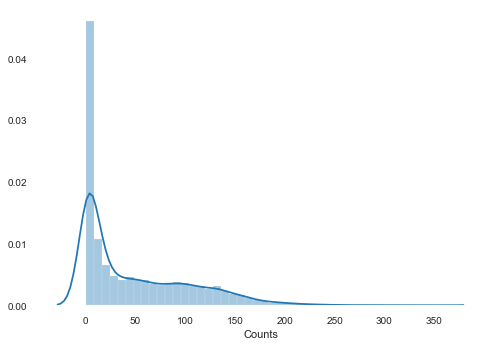

In [148]:
sns.distplot(traffic_count_data_clean['Counts'])

---
## Step 4: Create a combined traffic dataset

**Tasks:**
- Complete the `parse_all_counter_files` function in `src/traffic_exercise/data/clean_counting_data.py`
    - Provide a path to the function to save a combined, cleaned traffic data file to `data/interim/` as `counter_data.csv`
- **[Extension]** Validate that each cleaned datatable has the same parameters and no missing values. Consider using a tool such as [`bulwark`](https://pypi.org/project/bulwark/)


In [156]:
for name in os.listdir(traffic_data_path):
    print(name[:5], int(name[6:11]))

20011 20012
20053 20054
30021 30022
30023 30024
50003 50004
50009 50010
50011 50012
50043 50044
50053 50054
50077 50078
60003 60004
60005 60006


In [155]:
for name in os.listdir(traffic_data_path):
    print(name)

20011_20012_2019.xlsx
20053_20054_2019.xlsx
30021_30022_2019.xlsx
30023_30024_2019.xlsx
50003_50004_2019.xlsx
50009_50010_2019.xlsx
50011_50012_2019.xlsx
50043_50044_2019.xlsx
50053_50054_2019.xlsx
50077_50078_2019.xlsx
60003_60004_2019.xlsx
60005_60006_2019.xlsx


In [ ]:
 traffic_exercise.data.parse_counter_file(traffic_data_path / counter_file, counter)

In [ ]:
for name in os.listdir(traffic_data_path):
    df = traffic_exercise.data.parse_counter_file(traffic_data_path / name, int(name[:5]))
    df.append( traffic_exercise.data.parse_counter_file(traffic_data_path / name, int(name[6:11]))) 

In [163]:
dfs = []
dir_list = os.listdir(traffic_data_path)
for i in range(len(dir_list)):
    split_up = [s.strip() for s in dir_list[i].split("_")]
    counter = [int(val) for val in split_up[:-1]]
    for j in range(len(counter)):
        dfs.append(traffic_exercise.data.parse_counter_file(traffic_data_path / dir_list[i], counter[j]))

In [167]:
for df in dfs:
    print(type(df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [160]:
ch = '20011_20012_2019.xlsx'
for c in ch.split('_'):
    print(c.strip())

20011
20012
2019.xlsx


In [172]:
traffic_data_clean_combined = traffic_exercise.data.parse_all_counter_files(traffic_data_path,
                                        Path.cwd().resolve().parent /'analysis'/ "data" / "interim" / 'counter_data.csv')

In [174]:
traffic_data_clean_combined

,Date,Hour Ending,Special day,Counter ID,Counts
0,2019-01-01 01:00:00,1,bo,20011,12
244,2019-01-01 02:00:00,2,bo,20011,10
488,2019-01-01 03:00:00,3,bo,20011,2
732,2019-01-01 04:00:00,4,bo,20011,8
976,2019-01-01 05:00:00,5,bo,20011,2
...,...,...,...,...,...
6519,2019-12-31 20:00:00,20,o,60006,6
6845,2019-12-31 21:00:00,21,o,60006,6
7171,2019-12-31 22:00:00,22,o,60006,2
7497,2019-12-31 23:00:00,23,o,60006,0


In [175]:
traffic_data_clean_combined['Counter ID'].nunique()

24

---
## [Extension] Step 5: Unit test data cleaning functions

**Tasks:**
- Use [`pytest`](https://docs.pytest.org/en/latest/), or a similar package, to unit test data cleaning functions
    - Add tests to the `project root/tests/` directory

---
# Review
After this exercise:
- [ ] I can load and save data as common tabular data formats
- [ ] I can manipulate the structure fo a data table
- [ ] I can identify bad or missing data (_DATA 1_)
- [ ] I can implement checks against data structure (_DATA 1_)
- [ ] I can extract simple features from a data table (_DATA 1_)